## Исследование набора данных
Воспользуемся открытым репозиторием данных, в котором представлены почасовые измерения электропотребления, включенные в кодовую базу, представляющую архитектуру обновленной нейронной сети (описана далее) (Файл можно загрузить с репозитория поставщика на GitHub (https://github.com/laiguokun/multivariate-time-series-data/raw/master/electricity/electricity.txt.gz)). Чтобы понять, как выглядят исходные данные, считаем их с помощью инструментов языка R и построим несколько быстрых графиков.


In [5]:
library(data.table)
elec = fread('/kaggle/input/electric-new/electricity.csv')
colnames(elec) <- c('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16')

Быстрый просмотр позволяет понять, с каким количеством строк и столбцов придется работать. Заметьте, что значения не снабжены временными метками, но мы знаем, что данные собираются ежечасно, хотя достоверно не известно, когда именно проводились измерения.

In [6]:
ncol(elec)

[1] 16

In [7]:
nrow(elec)

[1] 38012

Визуализируем нескольких случайных выборок данных, чтобы получить представление о том, как они выглядят (рис. 9.2). Поскольку визуализации подлежат почасовые данные, будем считать, что суточные данные представляют 24 точки/значения.

NULL

NULL

NULL

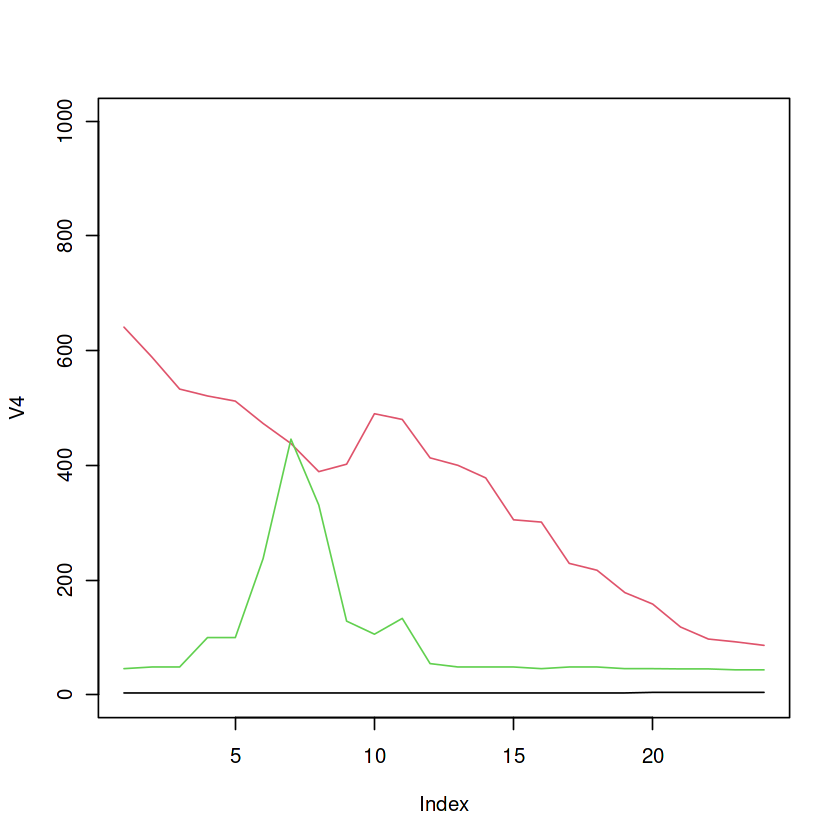

In [27]:
elec[125:148, plot(V4, type = 'l', col = 1, ylim = c(0, 1000))]
elec[125:148, lines(V14, type = 'l',, col = 2)]
elec[125:148, lines(V16, type = 'l', col = 3)]


. Выборка для трех различных населенных пунктов из 321 возможного варианта, включенного в исходный набор данных, за 24 часа. Несмотря на отсутствие информации о времени сбора показателей график представляет последовательную дневную модель

Также построим график за недельный срок

NULL

NULL

NULL

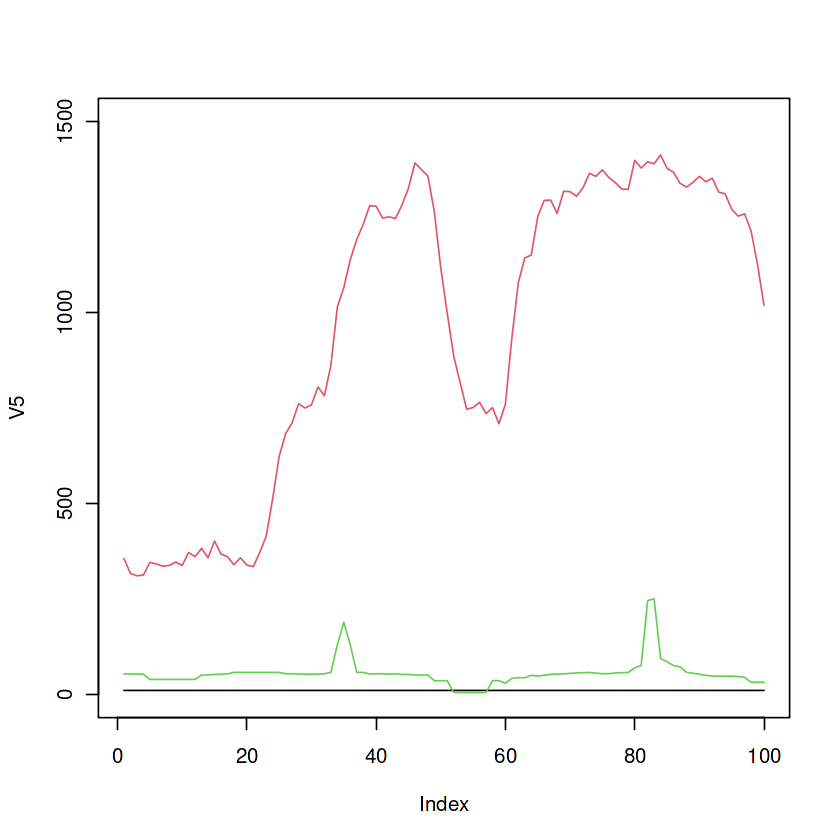

In [26]:
elec[1:100, plot (V5, type = 'l', col = 1, ylim = c(0, 1500))]
elec[1:100, lines(V14, type = 'l', col = 2)]
elec[1:100, lines(V16, type = 'l', col = 3)]


Полный семидневный цикл выборочных данных для тех же трех населенных пунктов. График подтверждает предположение о существовании дневного шаблона и указывает на присутствие в данных характерных ежедневных больших пиков, которые сопровождаются более мелкими выбросами

Заметьте, что нам ничего не известно о том, как временные точки согласуются с местным временем каждого населенного пункта, но хорошо известно соотношение между ними. Тем не менее, в соответствии с общими рассуждениями, приведенными в разделе 1, можно легко догадаться, какому времени суток соответствуют приведенные графики потребления электроэнергии. На них даже можно распознать выходные дни. Но мы не будем этого делать, хотя всегда неплохо исследовать данные в привязке ко времени суток и дням недели, чтобы получить более полное представление о поведении временного набора.
Очевидно, прогноз можно построить по абсолютным значениям, но это уже было сделано как в научных работах, так и многими блогерами. Давайте лучше предсказывать поведение по разности данных. Прогнозирование разностей, а не общих значений временного ряда, как правило, носит более сложный характер, поскольку они более зашумленные, что прекрасно видно на графиках, подобных отображаемым ранее


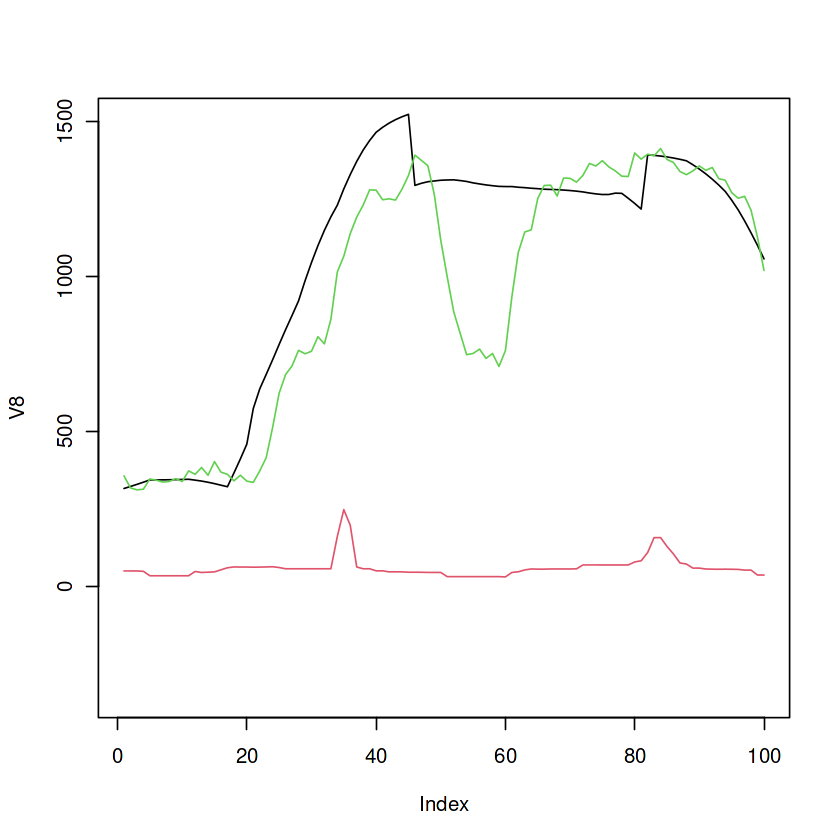

In [28]:
elec.diff = diff(elec[1:100, plot(V8, type = 'l', col = 1, ylim = c(-350, 1500))])
elec.diff1 = diff(elec[1:100, lines (V10, type = 'l', col = 2)])
elec.diff2 = diff(elec[1:100, lines (V14, type = 'l', col = 3)])

Для того чтобы использовать традиционную статистическую модель — пространства состояний или даже машинного обучения, — на этом этапе нам пришлось бы провести более детальный анализ данных для оценки корреляции между отдельными частями набора. Нам нужно было бы оценить, наблюдается ли в данных временной дрейф, и оценить их стационарность.
Такие же операции нужно выполнить и в глубоком обучении, чтобы подобрать подходящие модели для набора данных и определиться с тем, насколько точно они должны их описывать. Тем не менее модели глубокого обучения позволяют работать с намного более запутанными данными, а также без предварительного выполнения? указанного выше статистического анализа. В производственной среде исследование данных отнимает намного больше времени, чем в приведенных далее примерах, а в этом разделе мы можем сразу перейти к рассмотрению отдельных вариантов моделирования.

Недельная выборка временного ряда разностей потребляемой электроэнергии для трех населенных пунктов, представляющего ее почасовое изменение. Хотя в ряде разностей, как и в исходном ряде, наблюдается определенный шаблон, непрогнозируемые компоненты становятся более понятными, поскольку оказывают большее влияние на разностный ряд по сравнению с исходными данными

# Этапы конвейера обучения
--- в Py файле
.................